In [1]:
import keras
from keras.models import Sequential
from keras import datasets, layers
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import tensorflow as tf
print(tf.__version__)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

2.6.0


In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

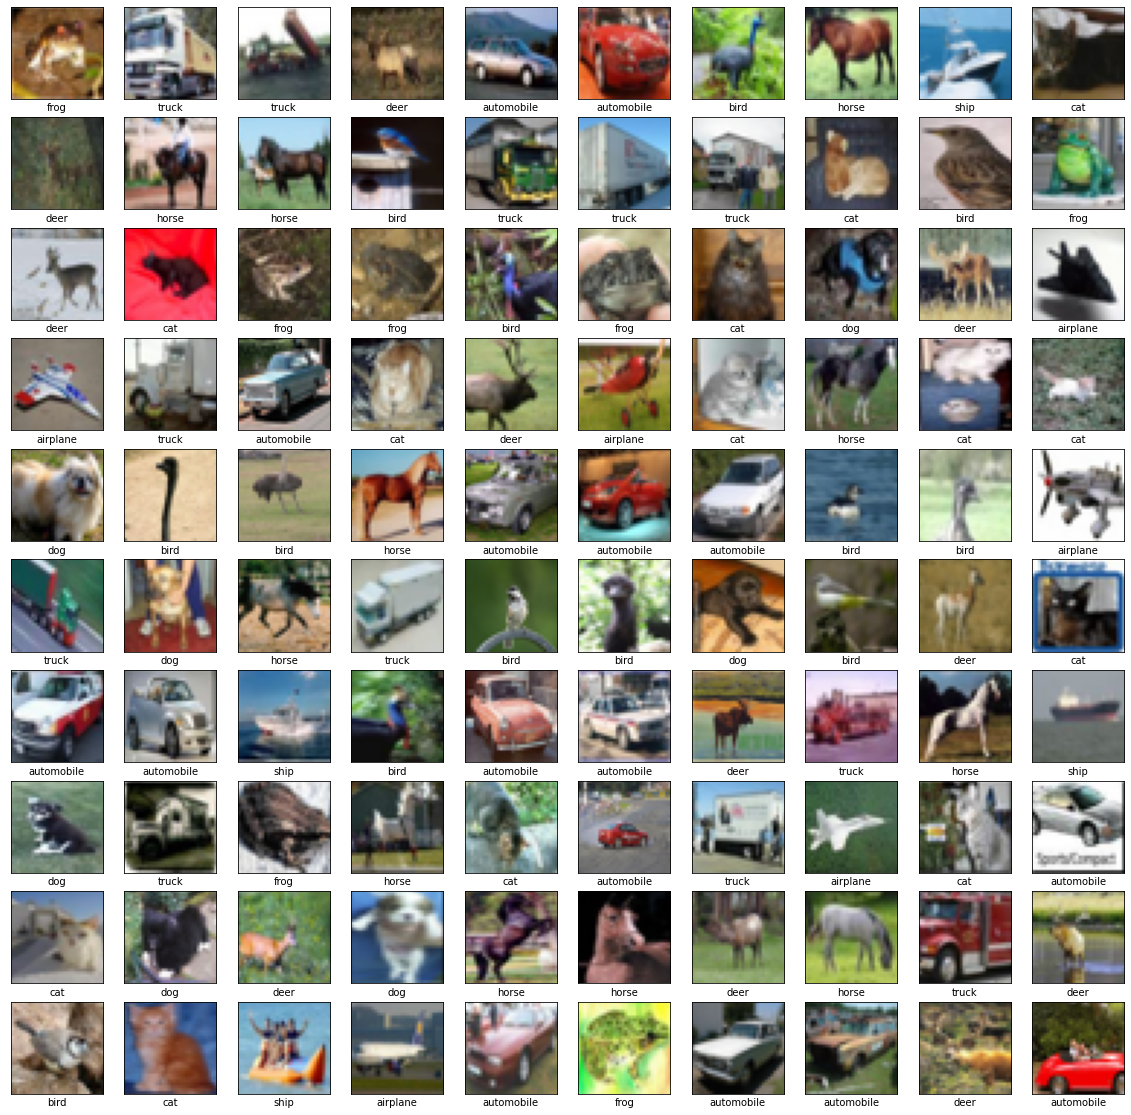

In [10]:
plt.figure(figsize=[20, 20])
for i in range (100):
  plt.subplot(10, 10, i+1) # 10 * 10 different images
  plt.xticks([])
  plt.yticks([])  
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(classes[train_labels[i][0]])

plt.show()

In [11]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
 
train_images = train_images / 255
test_images = test_images / 255 

train_labels = np_utils.to_categorical(train_labels, len(classes))
test_labels = np_utils.to_categorical(test_labels, len(classes))

In [12]:
model = Sequential() # declare the model

# Feature Learning Parts
model.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape=(32,32,3))) # started with "32" because of the image size is 32*32
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

# Classification Parts
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation = "softmax")) # softmax instead of relu because we need the probabilities and binary (like relu "0-1") is useless here

# Checking the model in a structured way, can also be visualized with tensorboard
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [13]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [14]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
782/782 [==============================] - 95s 120ms/step - loss: 1.6490 - accuracy: 0.4370 - val_loss: 1.1281 - val_accuracy: 0.6052
Epoch 2/5
782/782 [==============================] - 100s 128ms/step - loss: 1.1483 - accuracy: 0.5943 - val_loss: 1.1051 - val_accuracy: 0.6279
Epoch 3/5
782/782 [==============================] - 96s 123ms/step - loss: 1.0162 - accuracy: 0.6452 - val_loss: 0.8859 - val_accuracy: 0.6934
Epoch 4/5
782/782 [==============================] - 93s 119ms/step - loss: 0.9201 - accuracy: 0.6790 - val_loss: 0.8163 - val_accuracy: 0.7150
Epoch 5/5
782/782 [==============================] - 89s 114ms/step - loss: 0.8685 - accuracy: 0.6996 - val_loss: 0.8327 - val_accuracy: 0.7054


Text(0.5, 1.0, 'Loss Curves')

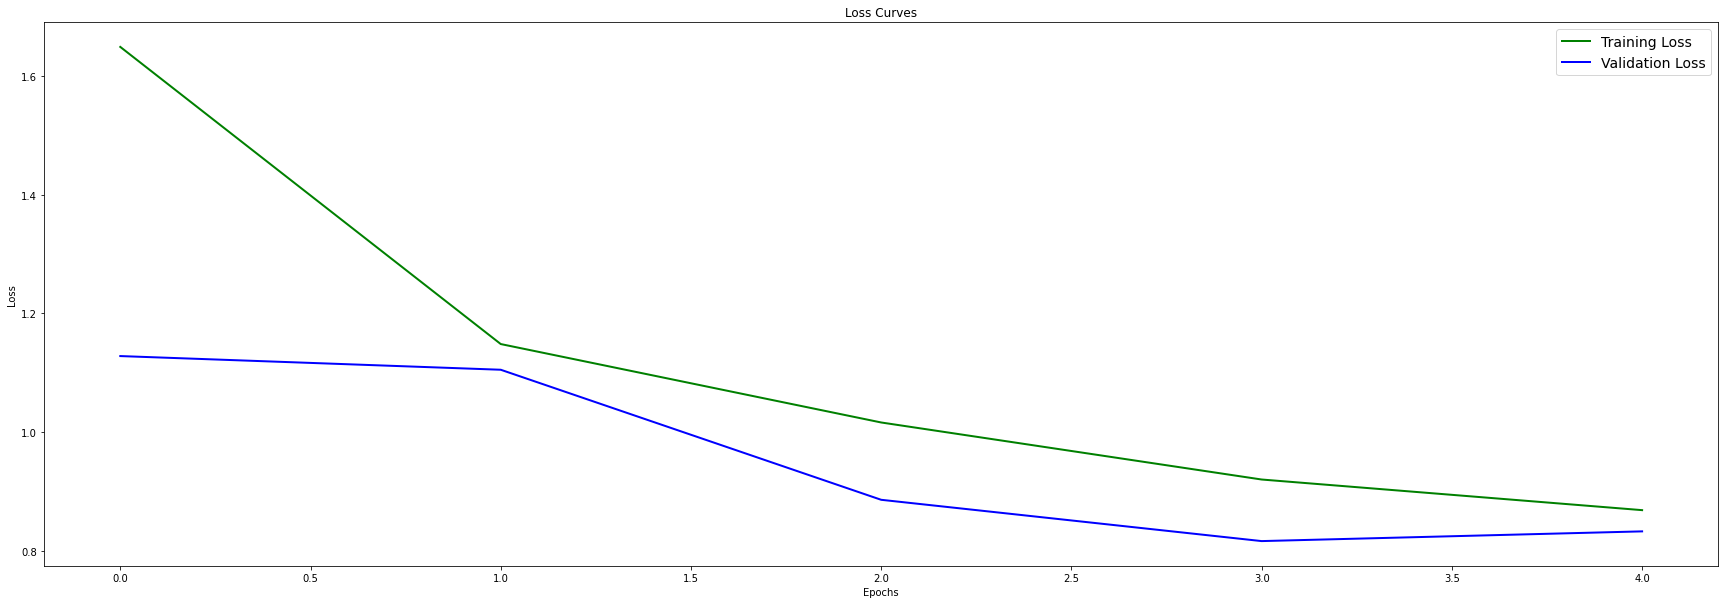

In [15]:
plt.figure(figsize = [30,10])
plt.plot(history.history["loss"], "g", linewidth = 2.0)
plt.plot(history.history["val_loss"], "b", linewidth = 2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize = 14)
plt.xlabel("Epochs", fontsize = 10)
plt.ylabel("Loss", fontsize = 10)
plt.title("Loss Curves", fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

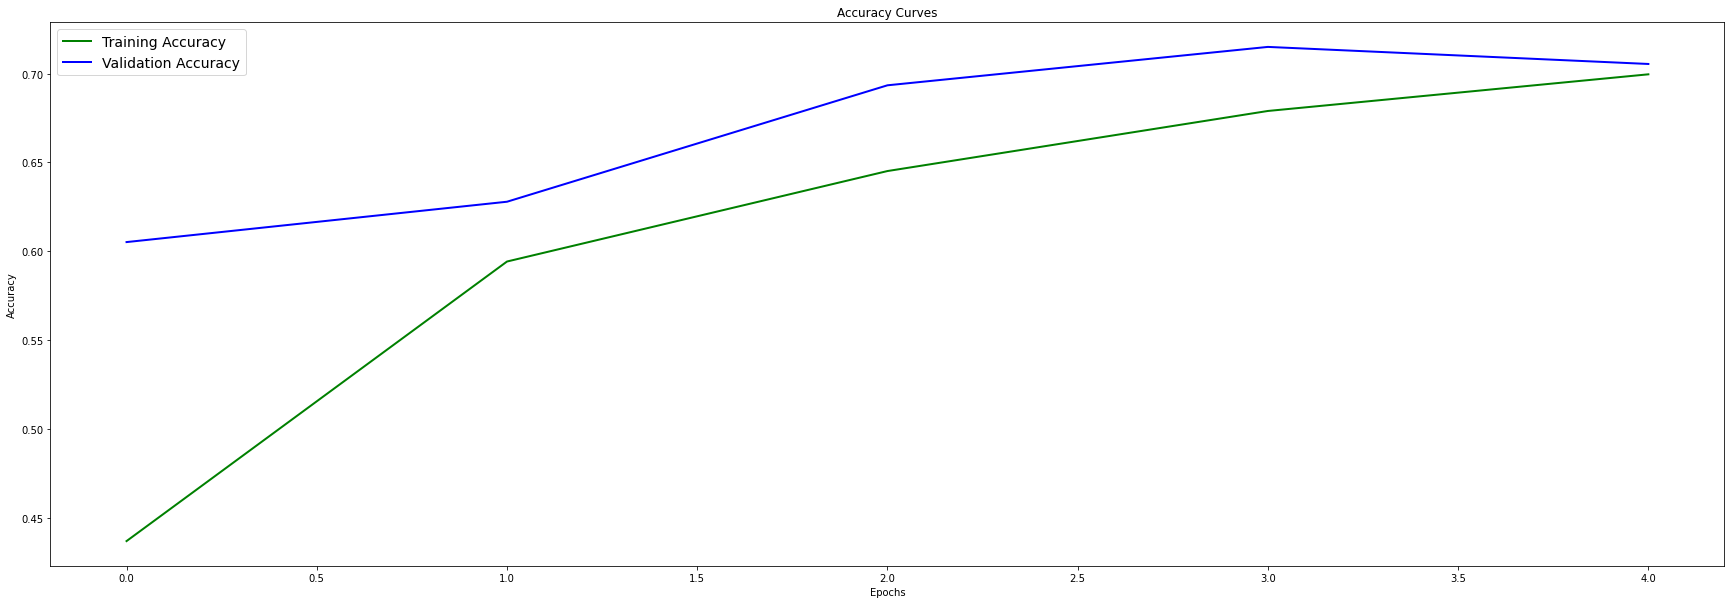

In [16]:
plt.figure(figsize = [30,10])
plt.plot(history.history["accuracy"], "g", linewidth = 2.0)
plt.plot(history.history["val_accuracy"], "b", linewidth = 2.0)
plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize = 14)
plt.xlabel("Epochs", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10)
plt.title("Accuracy Curves", fontsize = 12)

In [17]:
pred = model.predict(test_images)
print(pred)

pred_classes = np.argmax(pred, axis = 1)
print(pred_classes)

[[1.0996260e-03 2.3058624e-04 2.4262033e-03 ... 8.2523318e-04
  1.0100045e-03 1.0272667e-03]
 [4.6698535e-03 3.7182423e-01 2.1639482e-05 ... 1.2859523e-06
  6.2017530e-01 3.2884877e-03]
 [4.5594346e-02 4.1997701e-01 1.1563265e-03 ... 1.0624283e-03
  4.9113637e-01 3.7486605e-02]
 ...
 [3.6461855e-04 4.2722932e-05 6.8620034e-02 ... 1.7292010e-02
  1.9401430e-04 1.6848989e-04]
 [1.4188270e-01 6.2747949e-01 1.4404870e-02 ... 3.0377870e-03
  1.6247498e-02 2.3280503e-02]
 [4.2866082e-05 2.4055636e-04 2.8589589e-03 ... 9.6844012e-01
  2.6155001e-05 2.6183052e-05]]
[3 8 8 ... 5 1 7]


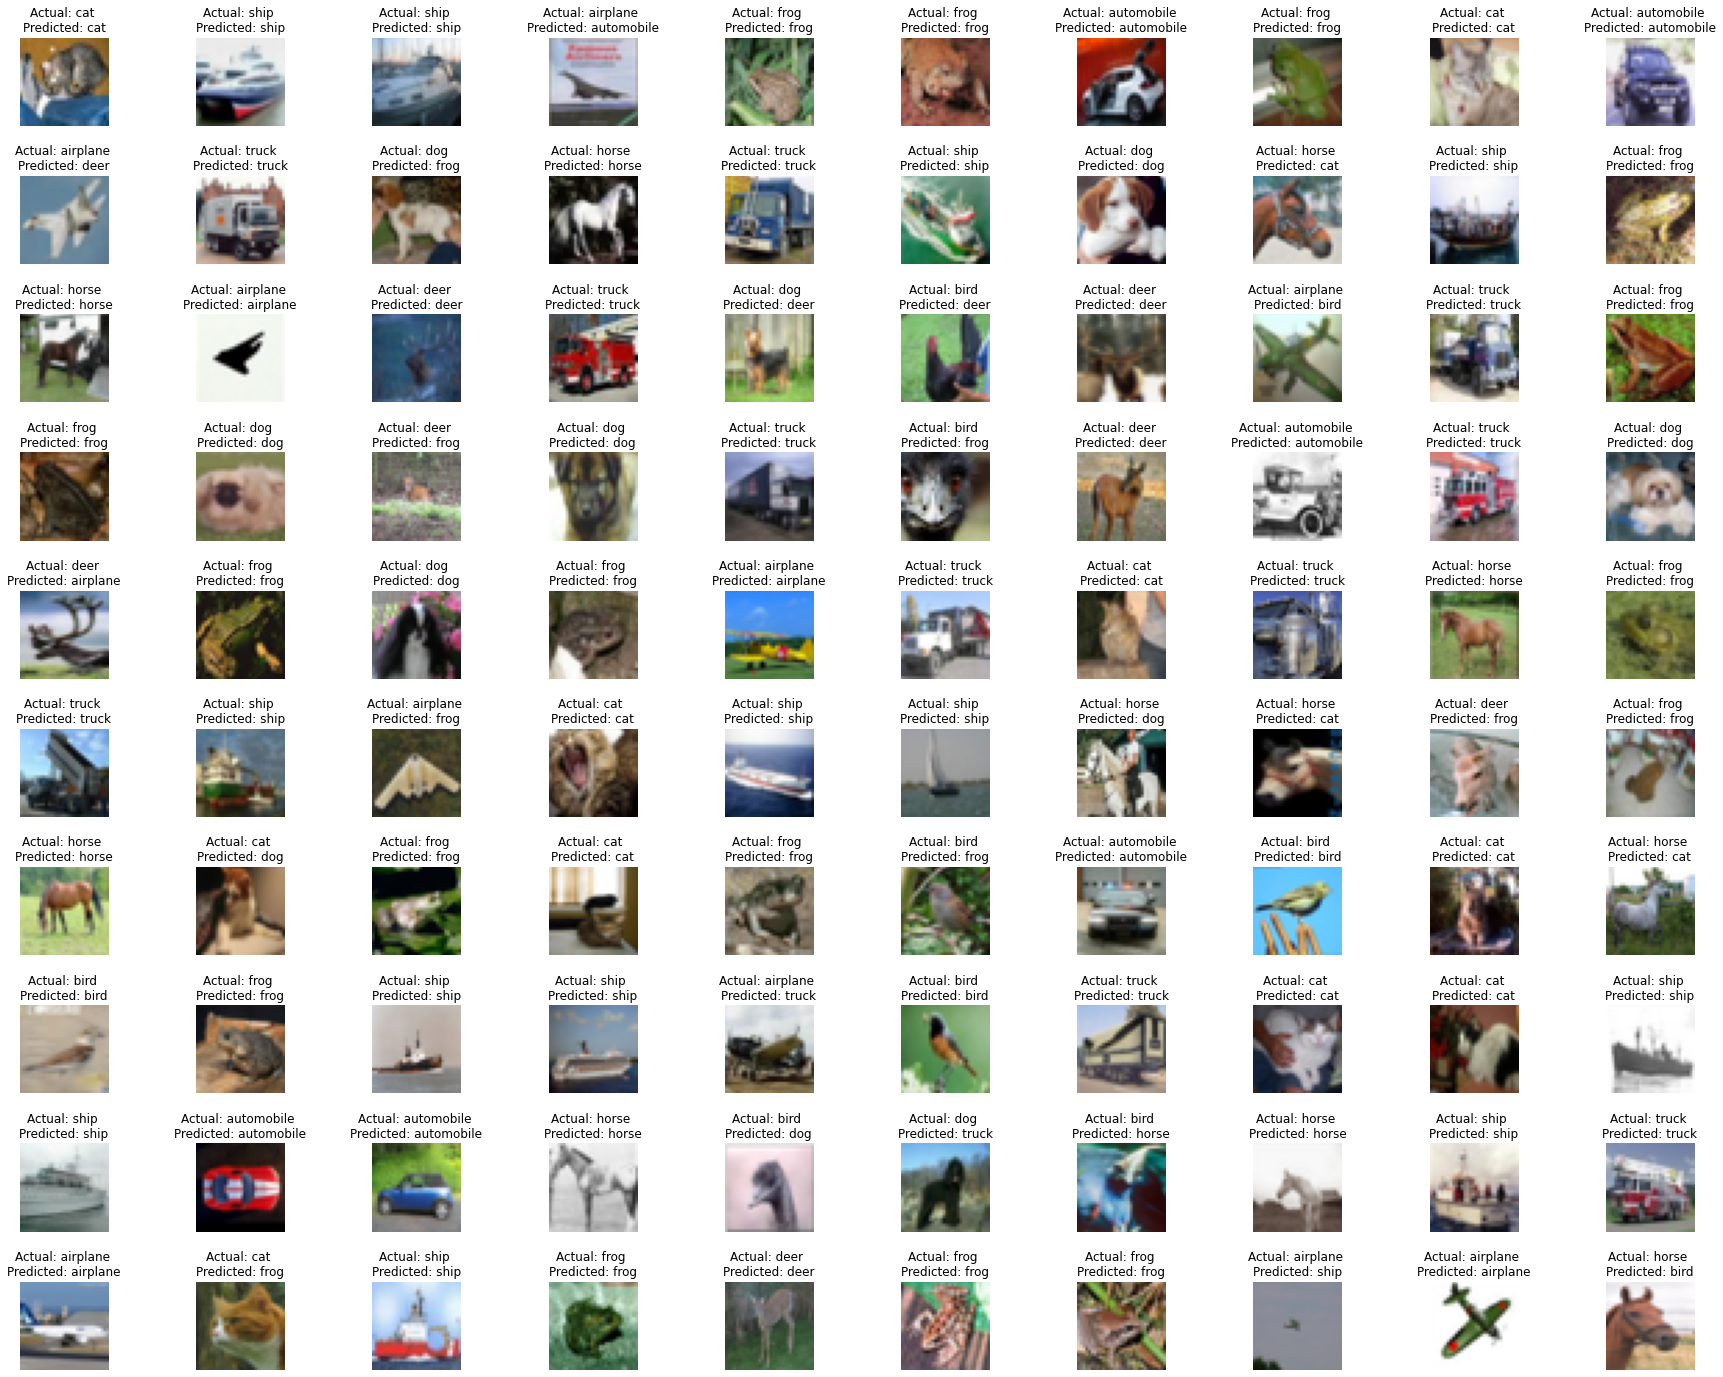

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(30,25))
axes = axes.ravel()

for i in np.arange(0, 100):
    axes[i].imshow(test_images[i])
    axes[i].set_title("Actual: %s \nPredicted: %s" % (classes[np.argmax(test_labels[i])], classes[pred_classes[i]]))
    axes[i].axis("off")
    plt.subplots_adjust(wspace=1)